# Introduction to Randomness
This notebook introduces fundamental concepts related to random numbers and generation of random numbers in Python.  By working through this module's materials as well as completing the associated homework, you should be able to:

- Determine the probability of an event happening given a probability density function.
- Generate sets of random numbers with Python that fit uniform and normal distributions.
- Generate sets of random numbers with Python that fit any given probability density function.

- Fit a normal distribution to a set of random numbers using average and standard deviation.

- Create and plot histograms for given data.

In Python, there are two main options for generating random numbers.  First, Python has the module [random](https://docs.python.org/library/random.html) for generating random numbers.  Second, [Numpy](http://www.numpy.org/) includes a [set of random routines](https://docs.scipy.org/doc/numpy/reference/routines.random.html).  Numpy is very commonly used package for array operations.  It includes highly efficient routines for manipulating array data.  Therefore, all of its random routines return arrays of data rather than single values.  Since we have yet to learn and use Numpy, we will use the Python's [random module](https://docs.python.org/library/random.html) in this introduction.

This document introduces the [Uniform Distribution](#Uniform-Distribution), [Probability Distribution Functions](#Probability-Distribution-Functions), the [Normal Distribution](#Normal-Distribution), and [Generating Random Numbers for Arbitrary PDF](#Generating-Random-Numbers-for-Arbitrary-PDF).

## Uniform Distribution
Perhaps the simplest random number distribution is a uniform distribution.  The uniform distribution gives equal probability for all numbers in the range.  A classic example of a uniform distribution is often used by children to choose one person from a group.  In this case, one child will place one hand behind their back holding up one to five fingers.  They will then tell their friends to choose a number between one and five.  The person who guess correctly is the chosen person.  The key assumption in this method is that there is equal probability of the child holding up any of the numbers between one and five.  In the case of the child who may have a favorite they want picked, this might not be a good assumption.  Our computer tools do a fairly good job giving a uniform probability of all numbers in the desired range.

To generate random numbers using Python's [random](https://docs.python.org/library/random.html) module, it must first be imported.  While we could use `from random import *`, we will instead keep all of the random functions in their own namespace.  This will help us understand what we are using from the random module.

In [1]:
import random    #import the random module, but keep all functions in the random namespace.
#Set the displayed precision to 3 decimal points.
%precision 3     

'%.3f'

The function [uniform(a,b)](https://docs.python.org/3/library/random.html#random.uniform) returns a random number between the range a and b as the example below shows.  Try evaluating the cell below several times, you will notice that each evaluation returns a different value.

In [2]:
random.uniform(0,5)

0.177

The function above returns a real or floating point number.  The function [randrange](https://docs.python.org/library/random.html#random.randrange) returns integer values as the code below illustrates.

In [3]:
random.randrange(0,5)

3

## Probability Distribution Functions
Using a uniform distribution, let us discuss the meaning of a probability distribution function.

Consider the case of holding up zero to five fingers.  If I do this, what is the probability, that I am holding up three fingers, $P(3)?$  Enter you answer in the cell below. 

In [4]:
prob_of_three = 0.10     #Replace the 0.10 with your answer to the question above    

Now that you have made the prediction, let us see if you are correct.  In the cell below, we generate a lot of random integers and then count how many of each number we generated.  The probability that any given number was generated is the number of times that number was generated divided by the total numbers generated.  The probability of generating a three is:
$$P(3)=\frac{Number\:of\:3's\:Generated}{Numbers\:Generated}$$

First, let us generate a few numbers and visually inspect them.

In [5]:
Numbers_Generated = 20;     #How many random numbers will be generated.
low = 0; high = 6 ;         #The minimum and maximum + 1 numbers which will be generated.
                            #This will generate random numbers n st. 0<=n<6 or 0<=n<=5 
Numbers = [random.randrange(low,high) for n in range(Numbers_Generated)]
Numbers

[2, 2, 4, 2, 2, 0, 1, 0, 0, 0, 4, 1, 0, 0, 1, 3, 1, 4, 1, 3]

The code above does generate integer values between 0 and 5.  Note that 0 and 5 are in the returned list, but numbers outside the interval like -1 and 6 are not a part of the list.  Now, let us generate a lot of numbers, count how many of each was generated, and finally determine the probability of any given number being returned.

In [6]:
Numbers_Generated = 1000000;     #How many random numbers will be generated.
Numbers = [random.randrange(low,high) for n in range(Numbers_Generated)]
#In the line below, Numbers.count(1) counts how many 1's are in the list numbers.
count = [Numbers.count(n) for n in range(low,high+1)]   
p = [count[n-low]/Numbers_Generated for n in range(low,high+1)]
p

[0.167, 0.166, 0.166, 0.167, 0.166, 0.167, 0.000]

Let us plot these probabilities.  For this, we will import plotting tools from [matplotlib](http://matplotlib.org/).

In [7]:
#This code performs the necessary steps to prepare to plot.
from matplotlib import pyplot
import math   #need for a few functions.

#Set the default plot to be inline rather than a new window.
%matplotlib inline

You seemed to have not gotten the correct answer for P(3)


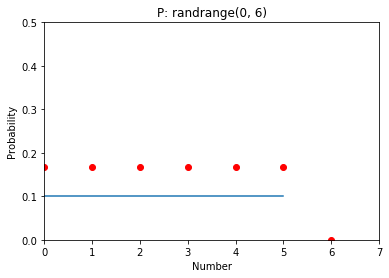

In [8]:
MyFigure, MyAxes = pyplot.subplots(1, 1);
MyAxes.plot(range(low,high+1), p, 'ro',label = 'P: randrange('+str(low)+', '+str(high)+')');
MyAxes.set_xlabel('Number');
MyAxes.set_ylabel('Probability');
MyAxes.set_title('P: randrange('+str(low)+', '+str(high)+')');
MyAxes.set_xlim((low,high+1));
MyAxes.set_ylim((0,0.5));
MyFigure
if not math.isclose(prob_of_three, 1/6):
    print('You seemed to have not gotten the correct answer for P(3)')
    MyAxes.axhline(y=prob_of_three,xmax=(high-1)/(high+1))

In this case, the different possibilities all have equal probability.  Since there are 6 possibilities for the number of fingers held up on one hand (zero is a possibility), each have a probability of $$P=\frac16=0.167$$ as the graph above shows.  There is an equal probability of 0.167 for numbers 0-5 while number 6 has zero probability.

Now, let us generate real numbers instead of integers.  We will use the [uniform(a,b)](https://docs.python.org/3/library/random.html#random.uniform) function.

In [9]:
Numbers_Generated = 10;     #How many random numbers will be generated.
low = 0; high = 5 ;         #The minimum and maximum numbers generated.
                            #This will generate random numbers r st. 0<=r<=5.
Numbers = [random.uniform(low,high) for n in range(Numbers_Generated)]
Numbers

[1.476, 1.814, 2.198, 0.747, 3.435, 1.684, 1.824, 2.746, 2.764, 0.527]

Again, we will generate a lot of random numbers, count them to determine the probability.  With real numbers, we have to count the random numbers between a given interval.  For instance, if we counted how many 1's we have in our distribution, we would miss 1.0001.  We will use [matplotlib's histogram function](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib-axes-axes-hist) to count in this fashion and create the [histogram](http://mathworld.wolfram.com/Histogram.html).

We will again generate a uniform distribution between 0 and 5.

In [10]:
Numbers_Generated = 500000;     #How many random numbers will be generated.
Numbers = [random.uniform(low,high) for n in range(Numbers_Generated)]

We will use a bin size of 1 and count how many random numbers are between 0 and 1, 1 and 2, (and so on).  The option `normed = True` of the [hist](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib-axes-axes-hist) method tells hist to divide the number in each bin by the total number of items or `Numbers_Generated` in this example.

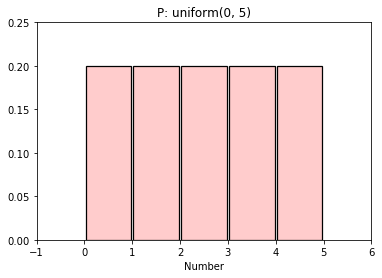

In [11]:
URFigure, URAxes = pyplot.subplots(1, 1);
histogram=URAxes.hist(Numbers, bins=5, normed=True,histtype='bar',rwidth=0.95, lw=1.25,ec='k',fc=(1, 0, 0, 0.2));
URAxes.set_xlabel('Number');
URAxes.set_title('P: uniform('+str(low)+', '+str(high)+')');
URAxes.set_xlim((low-1,high+1));
URAxes.set_ylim((0,0.25));

The plot above is a plot of a [probability distribution function](http://mathworld.wolfram.com/ProbabilityDensityFunction.html).  What is a probability distribution function you ask?  It is defined by the paragraph below.

For a given probability density function, $f\left(x\right)$, the probability of a number between a and b is the integral of function between a and b.  That is
$$P \left( a\leqq x \leqq b \right) =\int_a^bf\left(x^\prime \right)dx^\prime.$$
In the case of uniform probability between 0 and 5, the probability density function function is $f\left(x\right)=1/5=0.20$.  Note that the integral must be normalized.  That is $\int_{-\infty}^{+\infty}f\left(x\right)=1$.

## Normal Distribution
The [normal distribution](http://introcs.cs.princeton.edu/java/11gaussian/) or Gaussian is useful because it models many random distributions found in the real world.  We will also use a normal distribution model the range of unknown parameters in our models.  The normal distribution is a probability density function and is defined as $$f\left(x\right)=\frac{1}{\sigma \sqrt{2\pi}}e^{-(x-\mu)^2/{2\sigma^2}}$$
in which $\sigma$ is the standard deviation, and $\mu$ is the average.  The standard deviation gives the 'width' of the distribution.  $\mu$ is the peak of the distribution, and the distribution is symmetric about $x=\mu.$

The function below returns the value of the normal distribution for a given $x$, $\mu$ and $\sigma.$

### Python Function Definition

In [12]:
def N(x, μ, σ):
    return 1/(σ * math.sqrt(2*math.pi))*math.exp(-((x-μ)**2)/(2*σ**2))

### Plots
To make plotting easier, we bring in the function [linspace(start, stop, number)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) from numpy.  It returns an array of `number` values evenly spaced between `start` and `stop.`  If number is not given, 50 points are returned.

In [13]:
from numpy import linspace
from RandomExamples import *

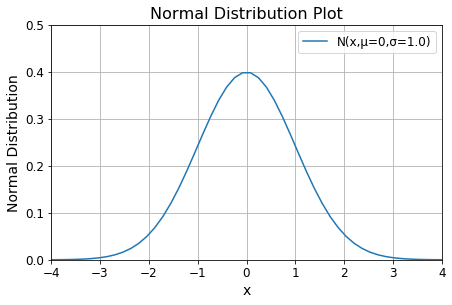

In [14]:
bottom=0;top=0.5; right = 4; left = -right; nx=linspace(left,right);
NFigure, NAxes = pyplot.subplots(1, 1);
NAxes.plot(nx, [N(x,0,1.0) for x in nx], '-', label = 'N(x,μ=0,σ=1.0)');
NAxes.set_xlabel('x'); NAxes.set_ylabel('Normal Distribution');
NAxes.set_title('Normal Distribution Plot');
NAxes.set_xlim(left,right); NAxes.set_ylim(bottom,top); format_plot(NAxes)

### Standard Deviation
As the plot below shows, the standard deviation, $\sigma$, describes the spread in the normal distribution.

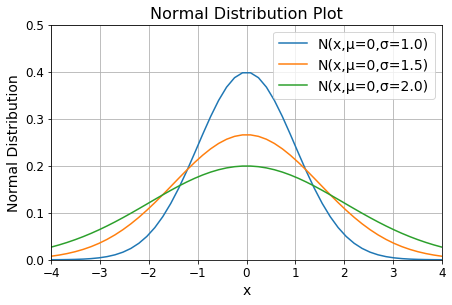

In [15]:
NAxes.plot(nx, [N(x,0,1.5) for x in nx], '-',label = 'N(x,μ=0,σ=1.5)');
NAxes.plot(nx, [N(x,0,2.0) for x in nx], '-',label = 'N(x,μ=0,σ=2.0)');
NAxes.legend(fontsize=14)
NFigure

### Average
The average or $\mu$ describes the position of the peak.

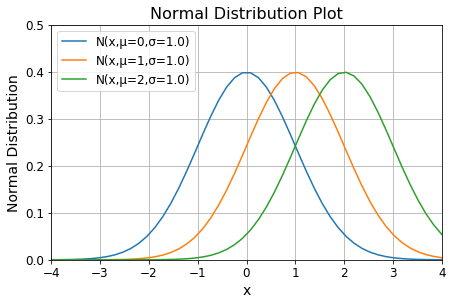

In [16]:
bottom=0;top=0.5; right = 4; left = -right; nx=linspace(left,right);
N2Figure, N2Axes = pyplot.subplots(1, 1);
N2Axes.plot(nx, [N(x,0,1.0) for x in nx], '-', label = 'N(x,μ=0,σ=1.0)');
N2Axes.plot(nx, [N(x,1,1.0) for x in nx], '-', label = 'N(x,μ=1,σ=1.0)');
N2Axes.plot(nx, [N(x,2,1.0) for x in nx], '-', label = 'N(x,μ=2,σ=1.0)');
N2Axes.set_xlabel('x'); N2Axes.set_ylabel('Normal Distribution');
N2Axes.set_title('Normal Distribution Plot');
N2Axes.set_xlim(left,right); N2Axes.set_ylim(bottom,top); format_plot(N2Axes)

### Random Numbers Fitting Normal Distribution
In many cases, we will not want the normal distribution itself, but instead a set of random numbers that fit the normal distribution.  In Python, we can generate these random numbers using [random.gauss($\mu$, $\sigma$)](https://docs.python.org/3/library/random.html#random.gauss).  First we generate just one number and then a small set of numbers.

In [17]:
μ=0;σ=1;
random.gauss(μ, σ)

-2.208

In [18]:
Numbers_Generated = 10;     #How many random numbers will be generated.
Numbers = [random.gauss(μ, σ) for n in range(Numbers_Generated)]
Numbers

[-0.448, -1.090, -0.925, -1.371, -0.814, 0.260, -1.206, -0.137, 0.081, -0.825]

Now, let us make a [histogram](http://mathworld.wolfram.com/Histogram.html) of the numbers generated by the gauss function.  We will again use [matplotlib's histogram function](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib-axes-axes-hist) in creating the histogram.

In [19]:
Numbers_Generated = 1000000;     #How many random numbers will be generated.
Numbers = [random.gauss(μ, σ) for n in range(Numbers_Generated)]

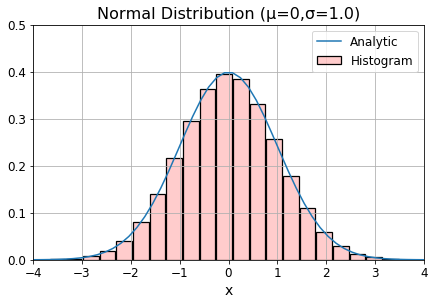

In [20]:
bottom=0;top=0.5; right = 4; left = -right; nx=linspace(left,right);
NDFigure, NDAxes = pyplot.subplots(1, 1);
NDAxes.plot(nx, [N(x,0,1.0) for x in nx], '-', label = 'Analytic');
histogram=NDAxes.hist(Numbers, bins=30, normed=True,histtype='bar',
                      rwidth=0.95, lw=1.25,ec='k',fc=(1, 0, 0, 0.2),
                     label = 'Histogram');
NDAxes.set_xlabel('x'); NDAxes.set_title('Normal Distribution (μ=0,σ=1.0)');
NDAxes.set_xlim((left ,right)); NDAxes.set_ylim((bottom, top)); format_plot(NDAxes)

Note that `random.gauss` returns one number.  In the histogram plot above, we should think of these numbers along the X axis.  The y value of the histogram is determined by counting how many numbers were returned in each interval or bin.  Thus, the bin around 0 is higher because there were more random numbers returned in that bin.  Gauss does not return a uniform distribution of random numbers.  Instead it returns a set of random numbers with probability given by the normal distribution.

### Fitting a Normal Distribution to Given Random Numbers
Another common task is to take a set of numbers and fit a normal distribution to that set of numbers.  Many times, the input number set comes from experimental data.  For example, the data below gives the daily high and low temperature in May 2016 at Oklahoma City.  This data was taken from [Weather Underground](https://www.wunderground.com/history/airport/KOKC).

In [21]:
HighT=[65, 63, 71, 82, 82, 82, 82, 77, 83, 90,
       85, 80, 82, 64, 66, 73, 61, 67, 61, 74,
       81, 81, 77, 87, 89, 87, 82, 84, 89, 82, 84]
LowT =[56, 55, 56, 65, 66, 66, 67, 70, 71, 71,
       75, 67, 66, 58, 60, 64, 59, 60, 57, 65,
       72, 73, 71, 79, 82, 77, 73, 72, 78, 73, 75]

We can fit a normal distribution to this data by simply calculating the mean and standard deviation of the data.  While we could calculate the average and standard deviation by writing our own function to do so, we will instead use tools from [Numpy](http://www.numpy.org/).  We will use [numpy.mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html#numpy.mean) and [numpy.std](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html#numpy.std).  While these functions have several options, we can currently ignore the options and just send the functions the list of numbers.

In [22]:
from numpy import mean, std

In [23]:
μ_HighT=mean(HighT);σ_HighT=std(HighT)
print("The average high temperature was {:2.1f} with a standard deviation of {:4.3f}".format(μ_HighT,σ_HighT))
μ_LowT=mean(LowT);σ_LowT=std(LowT)
print("The average low temperature was {:2.1f} with a standard deviation of {:4.3f}".format(μ_LowT,σ_LowT))

The average high temperature was 77.8 with a standard deviation of 8.711
The average low temperature was 67.7 with a standard deviation of 7.332


We now plot a histogram and the normal fit to both the low temperature and high temperature data.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


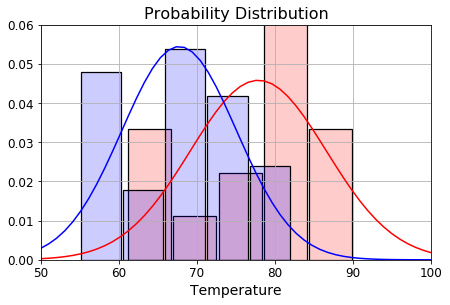

In [24]:
bottom=0;top=0.06; left = 50; right = 100;  nx=linspace(left,right);
TFigure, TAxes = pyplot.subplots(1, 1);
TAxes.plot(nx, [N(x,μ_HighT, σ_HighT) for x in nx], 'r-', label = '_High T Fit');
TAxes.plot(nx, [N(x,μ_LowT , σ_LowT ) for x in nx], 'b-', label = '_Low  T Fit');
HTHistogram=TAxes.hist(HighT, bins=5, normed=True,histtype='bar', label = '_High T Histogram',
                      rwidth=0.95, lw=1.25,ec='k',fc=(1, 0, 0, 0.2));
LTHistogram=TAxes.hist(LowT, bins=5, normed=True,histtype='bar', label = '_Low T Histogram',
                      rwidth=0.95, lw=1.25,ec='k',fc=(0, 0, 1, 0.2));
TAxes.set_xlabel('Temperature');
TAxes.set_title('Probability Distribution');
TAxes.set_xlim((left ,right));
TAxes.set_ylim((bottom, top));
format_plot(TAxes)

In this case, the fit of the normal distribution is not very good.  It was significantly cold at the start of the month.  There is a good chance that increasing the sample size by including May temperatures from other years would improve the fit between the actual data and the fitted normal distribution.

## Generating Random Numbers for Arbitrary PDF
There are other python functions which generate probability density functions for other standard distributions.  The [random module documentation](https://docs.python.org/library/random.html#module-random) lists these functions.

In some cases, we will want to generate random numbers that fit a generic PDF.  For this, we can write our own function to return numbers according to the given PDF.  The typical algorithm to accomplish this is:
- generate two random numbers, x and p, from uniform distributions.
- x is the number we might return
- p is a probability.
- if PDF(x) > P then return the number, otherwise ignore both numbers.

These steps are executed in a loop until the desired number of random values is returned.  The generated numbers will be random, but share the distribution of the of the given function.  Let us illustrate this with an example.  Our PDF will be $sin^2(x)$ on the interval $0$ to $2\pi$.

In [25]:
def PDF(x):
    return 1/math.pi * (math.sin(x))**2  #This is a normalized function.

In [26]:
def GenRandom(min,max):
    #min and max define the range of the PDF.
    Generated = False
    while not Generated:
        x=random.uniform(min,max)  #This is the number that might be returned.
        p=random.uniform(0,1)      #This asssumes that PDF(x) < 1 for all x.
        if PDF(x) >= p:            #   PDF(x) does not acutally have to be normalized.
            Generated = True
    return x                       #We got out of the while loop so x is a good number.

In [27]:
Numbers_Generated = 10;        #How many random numbers will be generated.
low = 0; high = 2*math.pi ;    #The minimum and maximum numbers generated.
Numbers = [GenRandom(low,high) for n in range(Numbers_Generated)]
Numbers

[1.517, 1.741, 5.414, 4.123, 5.935, 4.689, 3.423, 0.958, 3.072, 4.097]

These numbers look OK, let us generate a large distribution, and plot the histogram along with the PDF function

In [28]:
Numbers_Generated = 10000;
low = 0; high = 2*math.pi ;
Numbers = [GenRandom(low,high) for n in range(Numbers_Generated)]

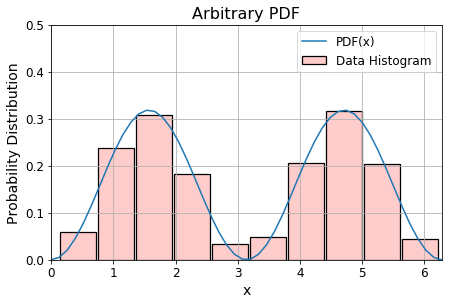

In [29]:
bottom=0;top=0.5; left = 0; right = 2*math.pi; nx=linspace(left,right);
NFigure, NAxes = pyplot.subplots(1, 1);
NAxes.plot(nx, [PDF(x) for x in nx], '-', label = 'PDF(x)');
HTHistogram=NAxes.hist(Numbers, normed=True,histtype='bar', label = 'Data Histogram',
                      rwidth=0.95, lw=1.25,ec='k',fc=(1, 0, 0, 0.2));
NAxes.set_xlabel('x'); NAxes.set_ylabel('Probability Distribution');
NAxes.set_title('Arbitrary PDF');
NAxes.set_xlim(left,right); NAxes.set_ylim(bottom,top); format_plot(NAxes)